In [1]:
import orbipy as op
import numpy as np
import pandas as pd

In [20]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
zero_state = model.get_zero_state()
# zero_state[[0, 4]] = hls[-500][[0, 4]]
model.R

np.float64(384400.0)

In [21]:
one_thousand_kms = (1-model.L1)/58

In [22]:
zero_state = model.get_zero_state()
zero_state[0] = model.L1 - 2 * one_thousand_kms
zero_state[2] = 3 * one_thousand_kms
zero_state[4] = 50000/model.R

In [23]:
left = op.eventX(model.L1 - 10 * one_thousand_kms)
right = op.eventX(model.L1 + 10 * one_thousand_kms)
correction = op.border_correction(model, op.y_direction(), left, right)
impulse_correction = op.simple_station_keeping(model, correction, correction, 2*np.pi)

In [26]:
df = impulse_correction.prop(0, zero_state, 10)

Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 


In [55]:
zero_state

array([0.83125368, 0.        , 0.04218658, 0.        , 0.07618973,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        ])

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


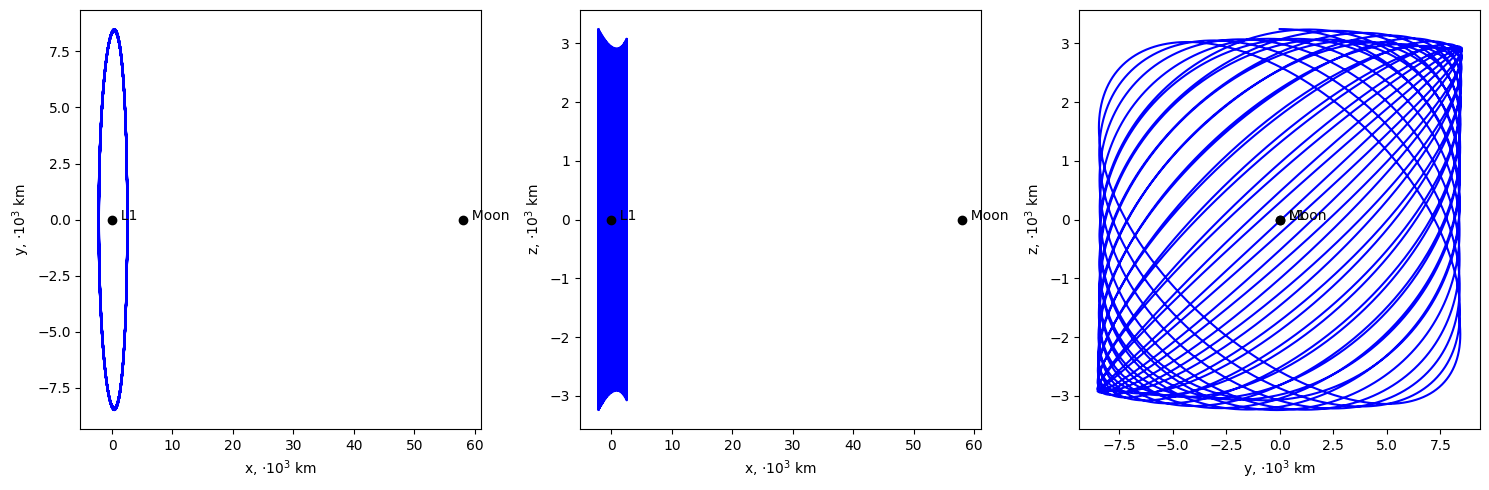

In [28]:
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df, centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.m, plotter.L1], colors='k',ls='',marker='o')

In [38]:
model.L1

np.float64(0.8368785595384785)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/project/.venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


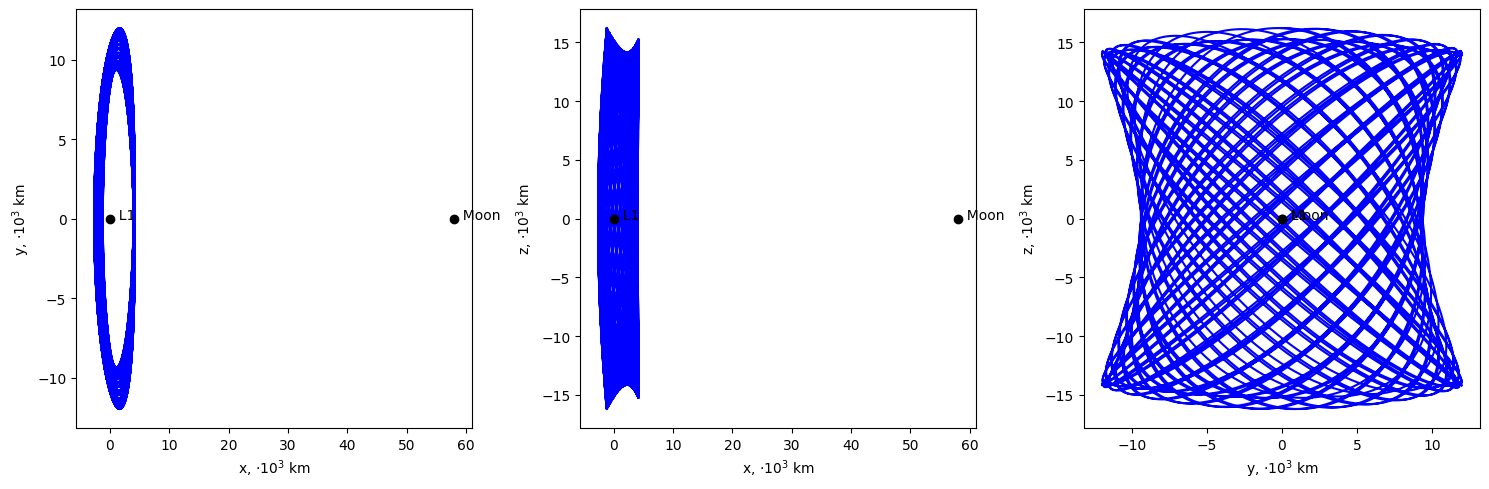

In [73]:
df = pd.read_csv(f'data/orbits/1/orbit_0.8337536277288707_0.042186579429703844_0.05365660214819832.csv')
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df, centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.m, plotter.L1], colors='k',ls='',marker='o')